In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.head()
# 34545 rows, 358 columns

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

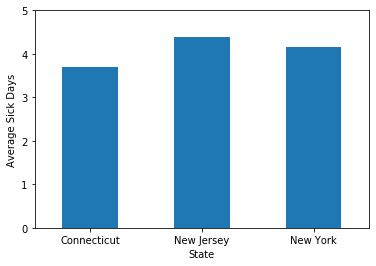

In [8]:
#df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind='bar')


plt.ylim(0,5)
plt.xticks(rotation=0)
plt.ylabel('Average Sick Days')

days_replace = {88:0, 77:np.nan, 99:np.nan}
df['PHYSHLTH'].replace(days_replace, inplace=True)
# replaces the values 88, 77, 99 in PHYSHLTH with the parameters in .replace()
df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind='bar')
state_replace = {9:'Connecticut', 34:'New Jersey', 36:'New York'}
df['_STATE'].replace(state_replace, inplace=True)
plt.xlabel('State')
plt.xticks(rotation=0)

In [6]:
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [7]:
state = df['_STATE'].isin(['New York','Connecticut', 'New Jersey'])
state

49938     True
49939     True
49940     True
49941     True
49942     True
          ... 
303774    True
303775    True
303776    True
303777    True
303778    True
Name: _STATE, Length: 34545, dtype: bool

Now check to see how large our subset df.

In [8]:
state.shape

(34545,)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [9]:
df['PHYSHLTH'].describe()
# 88 = no days
# 1 - 30 is the amount of days
# 77 = don't know/not sure
# 99 = refused
# BLANK = not asked or missing

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [10]:
health_replace = {88:0, 77:np.nan, 99:np.nan}

In [11]:
df['PHYSHLTH'].replace(health_replace, inplace=True)


# now, we know that on average, people are out sick 4 days a year.
# before, because the values were assigned to 88, 99, 77, the average was 60 days.

# the inplace=True saves the change in the master data set.
# if inplace=True, the master data set will have the old values the next time we call it.

In [12]:
df._STATE.describe()

count        34545
unique           3
top       New York
freq         12249
Name: _STATE, dtype: object

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [13]:
# graphic showing those descriptive stats

In [14]:
df._STATE.unique()

array(['Connecticut', 'New Jersey', 'New York'], dtype=object)

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [15]:
values = df.groupby('_STATE')['PHYSHLTH']
values.head()

49938      0.0
49939      0.0
49940      2.0
49941      0.0
49942      0.0
273284     0.0
273285     4.0
273286     0.0
273287     0.0
273288     0.0
291530     3.0
291531    24.0
291532     0.0
291533     7.0
291534     0.0
Name: PHYSHLTH, dtype: float64

Text(0.5, 0, 'State')

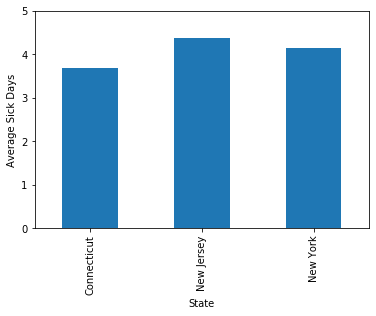

In [16]:
#df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind='bar')


plt.ylim(0,5)
plt.xticks(rotation=0)
plt.ylabel('Average Sick Days')

days_replace = {88:0, 77:np.nan, 99:np.nan}
df['PHYSHLTH'].replace(days_replace, inplace=True)

df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind='bar')
state_replace = {9:'Connecticut', 34:'New Jersey', 36:'New York'}
df['_STATE'].replace(state_replace, inplace=True)
plt.xlabel('State')

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



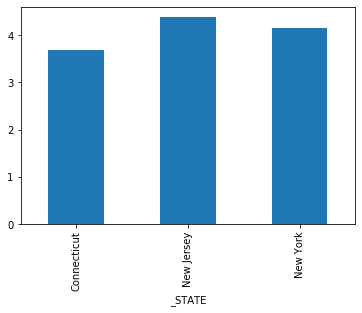

In [27]:
df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind='bar')

(6, 9)

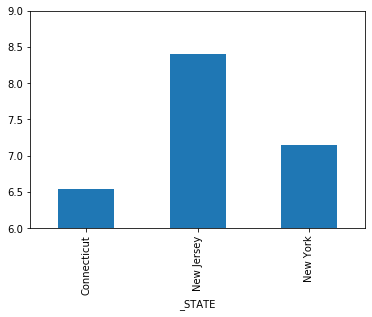

In [28]:
df['sick'] = np.where(df['PHYSHLTH']>=27, 1, 0)
sick_ppl = df.groupby('_STATE')['sick'].mean() * 100

sick_ppl.plot(kind='bar')
plt.ylim(6,9)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [29]:
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [20]:
# create graphic to compare chronically sick by state

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [51]:
# SMOKEDAY2 is a category: everyday, somedays, not at all
smoker_replace = {1:1, 2:1, 3:0, 7:np.nan, 9:np.nan}


df['SMOKDAY2'].replace(smoker_replace, inplace=False)
smokers = []

df.loc[df['SMOKDAY2'] == 1, ['_STATE']]
df.shape

    #if i == 3:
        # 121,722 people answered that they currently do not smoke. But what amount of time qualifies them as non smokers?
        # According to the National Health Organization, it takes 20 years after your last cigarette for your body 
        # to have the same risks as a non-smoker, thus making you a non smoker.
        #df['Non-smokers'] = np.where[df['LSTSMK2']==3, 1, 0]
    #if i == 7 or i == 9:
        #df['Other tobacco'] = np.where[df['USENOW3']==1 or df['USENOW3']==2, 1, 0]
        
        
# Non smokers should have a smokeday2 value of blank and a smokeday100 value of 2.
# Not at all - have smoked at least 100 cigs in their life but now do not smoke at all. smokeday2 value = 3.
# Some days = smokeday2 value = 2
# goal - transform questions into categories.. what qualifies a person to be a non-smoker?
# things to think about -OOO - order of operations

(34545, 359)

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  